In [19]:
import pandas as pd
import numpy as np

In [65]:
fraud_pred=pd.read_excel("Fraud prediction.csv.xlsx")
fraud_pred.head()

,EmpID,Fraud,NumYearsInSystem,Name,Sex,Age,NumLoanProducts,NumLiabilitiesProduct,CTC,MaritalStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [66]:
fraud_pred.isnull().sum()

EmpID                      0
Fraud                      0
NumYearsInSystem           0
Name                       0
Sex                        0
Age                      177
NumLoanProducts            0
NumLiabilitiesProduct      0
CTC                        0
MaritalStatus              2
dtype: int64

In [67]:
fraud_pred['MaritalStatus']=fraud_pred['MaritalStatus'].ffill()

In [68]:
fraud_pred.head()

,EmpID,Fraud,NumYearsInSystem,Name,Sex,Age,NumLoanProducts,NumLiabilitiesProduct,CTC,MaritalStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [69]:
fraud_pred.isnull().sum()

EmpID                      0
Fraud                      0
NumYearsInSystem           0
Name                       0
Sex                        0
Age                      177
NumLoanProducts            0
NumLiabilitiesProduct      0
CTC                        0
MaritalStatus              0
dtype: int64

In [70]:
fraud_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
EmpID                    891 non-null int64
Fraud                    891 non-null int64
NumYearsInSystem         891 non-null int64
Name                     891 non-null object
Sex                      891 non-null object
Age                      714 non-null float64
NumLoanProducts          891 non-null int64
NumLiabilitiesProduct    891 non-null int64
CTC                      891 non-null float64
MaritalStatus            891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [71]:
fraud_pred.corr()

,EmpID,Fraud,NumYearsInSystem,Age,NumLoanProducts,NumLiabilitiesProduct,CTC
EmpID,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Fraud,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
NumYearsInSystem,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
NumLoanProducts,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
NumLiabilitiesProduct,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
CTC,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [72]:
fraud_pred.shape

(891, 10)

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
sex=fraud_pred.groupby("Sex")["Fraud"].value_counts()

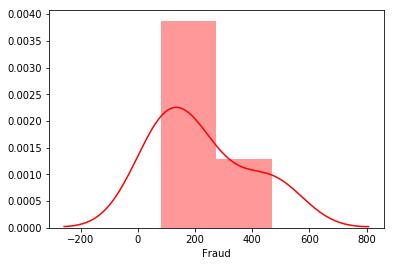

In [75]:
sns.distplot(sex,color='red')

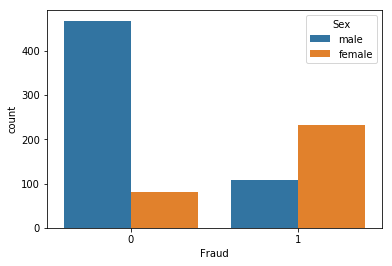

In [76]:
sns.countplot(x='Fraud',hue='Sex',data=fraud_pred)
plt.show()

In [77]:
df=fraud_pred.drop(['Name','Age','EmpID'],axis=1)

In [78]:
df.head()

,Fraud,NumYearsInSystem,Sex,NumLoanProducts,NumLiabilitiesProduct,CTC,MaritalStatus
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
X1 = LabelEncoder()
df['Sex'] = X1.fit_transform(df['Sex'])
df['MaritalStatus'] = X1.fit_transform(df['MaritalStatus'])

In [81]:
df.head()

,Fraud,NumYearsInSystem,Sex,NumLoanProducts,NumLiabilitiesProduct,CTC,MaritalStatus
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


CTC    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

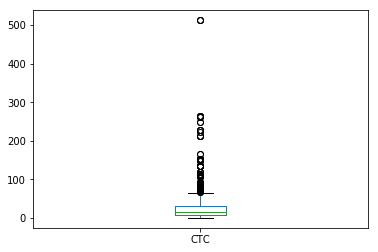

In [82]:
df['CTC'].plot(subplots=True , kind = 'box')

In [84]:
df["CTC"].dtypes

dtype('float64')

In [85]:
iqr = df['CTC'].quantile(.75) -  df['CTC'].quantile(.25)
q1 =  df['CTC'].quantile(.25)
q3 =  df['CTC'].quantile(.75)

lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

print( lb , ub )

-26.724 65.6344


In [92]:
df['CTC'].clip(lower = lb , upper = ub )

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
5       8.4583
6      51.8625
7      21.0750
8      11.1333
9      30.0708
10     16.7000
11     26.5500
12      8.0500
13     31.2750
14      7.8542
15     16.0000
16     29.1250
17     13.0000
18     18.0000
19      7.2250
20     26.0000
21     13.0000
22      8.0292
23     35.5000
24     21.0750
25     31.3875
26      7.2250
27     65.6344
28      7.8792
29      7.8958
        ...   
861    11.5000
862    25.9292
863    65.6344
864    13.0000
865    13.0000
866    13.8583
867    50.4958
868     9.5000
869    11.1333
870     7.8958
871    52.5542
872     5.0000
873     9.0000
874    24.0000
875     7.2250
876     9.8458
877     7.8958
878     7.8958
879    65.6344
880    26.0000
881     7.8958
882    10.5167
883    10.5000
884     7.0500
885    29.1250
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: CTC, Length: 891, dtype: float64

In [89]:
df.head()

,Fraud,NumYearsInSystem,Sex,NumLoanProducts,NumLiabilitiesProduct,CTC,MaritalStatus
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,65.6344,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


In [93]:
df['CTC'] = pd.DataFrame(df['CTC'])

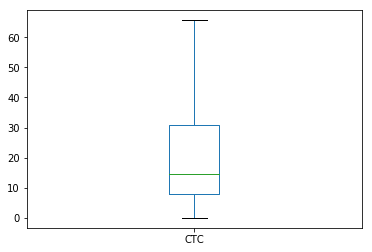

In [95]:
df['CTC'].plot(kind='box')

In [96]:
x = df.drop(['Fraud'],axis=1)
y = df['Fraud']

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [101]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [102]:
lr=LogisticRegression()
lr.fit(X_test,y_test)
pred=lr.predict(X_test)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
lr.score(X_test,y_test)

0.7597765363128491

In [109]:
lr.score(X_train,y_train)

0.7893258426966292

Area under the cureve: 0.8515444015444016


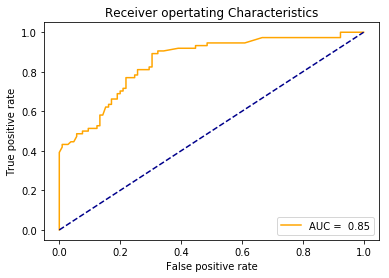

In [110]:
probs= lr.predict_proba(X_test)


from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the cureve:",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver opertating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC = % .2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [180]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [182]:
probs = np.where( probs[:, 1] >0.8 , 1 , 0 )

In [183]:
prod_df=pd.DataFrame(probs)

In [184]:
prod_df=prod_df*100

In [185]:
frad_prod=prod_df.join(y)
frad_prod.head()

,0,Fraud
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


In [127]:
fraud_prod1=frad_prod.drop(0,axis=1)

In [128]:
fraud_prod1

,1,Fraud
0,10.578756,0
1,16.969054,1
2,11.604290,1
3,78.980438,1
4,51.078464,0
5,94.900271,0
6,55.304825,0
7,8.929801,0
8,55.304825,1
9,79.248450,1


In [131]:
import numpy as np
fraud_prod1.groupby('Fraud')[1].agg(np.mean)

Fraud
0    39.321638
1    43.707378
Name: 1, dtype: float64

In [138]:
fraud_prod1[1].describe()

count    179.000000
mean      40.767217
std       28.956162
min        7.615091
25%       11.669133
50%       38.511465
75%       62.464156
max       95.187026
Name: 1, dtype: float64

In [141]:
bins = np.arange(0,101,10)
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

In [149]:
frad_prod1['labels'] = pd.cut(fraud_prod1[1], bins=bins , labels = labels)

In [152]:
frad_prod1['count'] = 1

In [153]:
frad_prod1.head(2)

,1,Fraud,labels,count
0,10.578756,0,10-20,1
1,16.969054,1,10-20,1


In [163]:
f = frad_prod1.groupby(['labels','Fraud']).agg({'Fraud':'count'}).rename(columns = {'Fraud':'Count'})
f.reset_index(inplace = True)

In [175]:
f['label_count'] = f.groupby(['labels'])['Count'].transform('sum')

In [176]:
f.head(2)

,labels,Fraud,Count,label_count
0,0-10,0,5,8
1,0-10,1,3,8


In [177]:
f['label_prob'] = f['Count'] / f['label_count']

In [179]:
f

,labels,Fraud,Count,label_count,label_prob
0,0-10,0,5,8,0.625000
1,0-10,1,3,8,0.375000
2,10-20,0,53,69,0.768116
3,10-20,1,16,69,0.231884
4,20-30,0,1,2,0.500000
5,20-30,1,1,2,0.500000
6,30-40,0,7,14,0.500000
7,30-40,1,7,14,0.500000
8,40-50,0,6,11,0.545455
9,40-50,1,5,11,0.454545


In [188]:
f[f['Fraud']==1] 

,labels,Fraud,Count,label_count,label_prob
1,0-10,1,3,8,0.375000
3,10-20,1,16,69,0.231884
5,20-30,1,1,2,0.500000
7,30-40,1,7,14,0.500000
9,40-50,1,5,11,0.454545
11,50-60,1,10,26,0.384615
13,60-70,1,7,16,0.437500
15,70-80,1,6,10,0.600000
17,80-90,1,1,6,0.166667
19,90-100,1,3,17,0.176471
